# NLP Preprocessing

In [1]:
import numpy as np
import pandas as pd
import nltk
import data_cleaning as dc
import stock_pricing as sp
import importlib

from nltk.stem import WordNetLemmatizer
from textblob import TextBlob

# Force reload data_cleaning and stock_pricing
importlib.reload(dc)
importlib.reload(sp)

# Prepare the NLTK resources
nltk.download('wordnet')
nltk.download('stopwords')
lemmatizer = WordNetLemmatizer()

# Define desired database parameters. Set to -1 to load all data.
database_size = -1

# Optionally force data to be regenerated
force_data_regeneration = False

try:
    # If force_data_regeneration is set, force an exception to reload the data
    if force_data_regeneration:
        print('Forcing data regeneration.')
        raise ValueError('Forcing data regeneration.')
    
    # Load the preprocessed data if it exists
    df = pd.read_csv('./stockerbot-export-preprocessed.csv')
    
    # If dataframe is not expected size, reload the data
    if database_size != -1 and len(df) > database_size:
        df = df.sample(n=database_size)
    elif database_size != -1 and len(df) < database_size:    
        print('Preprocessed file is not the expected size. Reloading data.')
        raise ValueError('Preprocessed file is not the expected size.')
    
    print('Preprocessed file found and loaded.')
except (FileNotFoundError, ValueError):
    # Load dataset with stock data
    df = sp.preprocess_nasdaq_df(database_size)

    # Add sentiment column with TextBlob if it doesn't exist
    df['tweet_polarity'] = df['text'].apply(lambda tweet: TextBlob(tweet).sentiment.polarity)
    df['tweet_subjectivity'] = df['text'].apply(lambda tweet: TextBlob(tweet).sentiment.subjectivity)

    # Apply preprocessing to the 'tweet' column
    df['preprocessed_tweet'] = df['text'].apply(lambda tweet: dc.preprocess_tweet(tweet, lemmatizer))
        
    # Save the preprocessed data
    df.to_csv('./stockerbot-export-preprocessed.csv', index=False)
    print('File preprocessing completed and saved.')

# Display the preprocessed dataframe
pd.set_option('display.max_colwidth', None)
print(f"Dataframe shape: {df.shape}")
display(df.head(5))

[nltk_data] Downloading package wordnet to /Users/seby/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/seby/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Forcing data regeneration.


FB-GOOGL-GOOG: No data found, symbol may be delisted
HRS: No data found, symbol may be delisted
INTC-USB: No data found, symbol may be delisted
AMZN-GPS: No data found, symbol may be delisted
TICKER: No data found, symbol may be delisted
CBS: No data found, symbol may be delisted
TWTR: No data found, symbol may be delisted
FB: No data found, symbol may be delisted
INFO: No data found, symbol may be delisted
JEC: No data found, symbol may be delisted
FNSR: No data found, symbol may be delisted
RE: No data found, symbol may be delisted
TMK: No data found, symbol may be delisted
NUAN: No data found, symbol may be delisted
TRQ: No data found, symbol may be delisted
DCIX: No data found, symbol may be delisted
FBHS: No data found, symbol may be delisted
PAH: No price data found, symbol may be delisted (period=10y)
WYN: No price data found, symbol may be delisted (period=10y)
LUK: No price data found, symbol may be delisted (period=10y)
FMSA: No price data found, symbol may be delisted (perio

Finished adding price data. Dropped 5303 rows.
File preprocessing completed and saved.
Dataframe shape: (22961, 17)


,id,text,timestamp,source,symbols,company_names,url,verified,month,day,year,Price Day Before Tweet,Price Day of Tweet,Price Day After Tweet,tweet_polarity,tweet_subjectivity,preprocessed_tweet
0,1019696670777503700,VIDEO: “I was in my office. I was minding my own business...” –David Solomon tells $GS interns how he learned he wa… https://t.co/QClAITywXV,2018-07-18 21:33:26,GoldmanSachs,GS,The Goldman Sachs,https://twitter.com/i/web/status/1019696670777503745,True,7,18,2018,202.197403,202.389938,200.98085,0.600000,1.000000,"[video, office, minding, business, –david, solomon, tell, $GS, intern, learned, wa…, https://t.co/QClAITywXV]"
1,1019709091038548000,The price of lumber $LB_F is down 22% since hitting its YTD highs. The Macy's $M turnaround is still happening.… https://t.co/XnKsV4De39,2018-07-18 22:22:47,StockTwits,M,Macy's,https://twitter.com/i/web/status/1019709091038547968,True,7,18,2018,29.254164,29.751337,30.74568,-0.155556,0.288889,"[price, lumber, $LB_F, 22, since, hitting, ytd, high, macy, $M, turnaround, still, https://t.co/XnKsV4De39]"
2,1019711413798035500,Who says the American Dream is dead? https://t.co/CRgx19x7sA,2018-07-18 22:32:01,TheStreet,AIG,American,https://buff.ly/2L3kmc4,True,7,18,2018,46.698978,47.057472,45.964901,-0.100000,0.200000,"[say, american, dream, dead, https://t.co/CRgx19x7sA]"
4,1019718460287389700,How satellites avoid attacks and space junk while circling the Earth https://t.co/aHzIV3Lqp5 #paid @Oracle https://t.co/kacpqZWiDJ,2018-07-18 23:00:01,Forbes,ORCL,Oracle,http://on.forbes.com/6013DqDDU,True,7,18,2018,44.556103,44.319199,44.136963,0.000000,0.000000,"[satellite, avoid, attack, space, junk, circling, earth, https://t.co/aHzIV3Lqp5, paid, @Oracle, https://t.co/kacpqZWiDJ]"
8,1019720723441635300,Senate wants emergency alerts to go out through Netflix Spotify etc. https://t.co/23yy3whBlc by @grg,2018-07-18 23:09:00,TechCrunch,NFLX,Netflix,https://tcrn.ch/2L8DsgT,True,7,18,2018,379.480011,375.130005,364.230011,0.200000,0.100000,"[senate, want, emergency, alert, go, netflix, spotify, etc, https://t.co/23yy3whBlc, @grg]"


In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# TF-IDF vectorization for the 'preprocessed_tweet' column
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
tfidf_features = tfidf_vectorizer.fit_transform(df['preprocessed_tweet'].astype('U'))  # Convert to Unicode

# One-hot encoding for categorical variables
onehot_encoder = OneHotEncoder()
categorical_features = onehot_encoder.fit_transform(df[['source', 'symbols']])

# Scaling numerical features
scaler = StandardScaler()
sentiment_features = scaler.fit_transform(df[['tweet_polarity', 'tweet_subjectivity']])
price_features = scaler.fit_transform(df[['Price Day Before Tweet', 'Price Day of Tweet']])

## Testing/Training Data

In [3]:
from sklearn.model_selection import train_test_split
from scipy.sparse import hstack

# Combine all features into a single matrix
X = hstack([tfidf_features, categorical_features, sentiment_features, price_features])

# The target variable
y = df['Price Day After Tweet'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
import pickle
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

def load_model(model_path, model_type, force_reload=False):
    """Load a model from a file.

    Args:
        model_path (str): The path to the model file.
        model_type (str): The type of model to load.
        force_reload (bool): Whether to force the model to be retrained.
    """
    # Check if the model type is valid
    if model_type not in ['RIDGE', 'LASSO']:
        raise ValueError('Invalid model type.')
    
    try:
        # Force the model to be retrained
        if force_reload:
            raise ValueError('Forcing model reload.')
        
        # Load the model if it exists
        with open(model_path, 'rb') as model_file:
            model = pickle.load(model_file)
            print(f'{model_type} model loaded.')
            return model
    except (FileNotFoundError, ValueError):
        # Set up hyperparameter grids for optimization
        params = {'alpha': np.logspace(-6, 6, 13)}
        
        # Get the correct model
        if model_type == 'RIDGE':
            model = Ridge()
        elif model_type == 'LASSO':
            model = Lasso()
        else:
            model = None
        
        # Train the model
        grid = GridSearchCV(model, params, cv=5, scoring='neg_mean_squared_error')
        grid.fit(X_train, y_train)
        model = grid.best_estimator_
        
        # Save the model
        with open(model_path, 'wb') as file:
            pickle.dump(model, file)
        
        print(f'{model_type} model trained and saved.')
        return model

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Train linear regression model
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)

# Train random forest regression model
random_forest_model = RandomForestRegressor(random_state=42)
random_forest_model.fit(X_train, y_train)

# Load the pretrained Ridge and Lasso models
ridge_model = load_model('./ridge_model.pkl', 'RIDGE')
lasso_model = load_model('./lasso_model.pkl', 'LASSO')

/Users/seby/Desktop/School/2024_Spring/cs4400/final_project/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:639: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30416.730018612703, tolerance: 16661.31742188937
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/seby/Desktop/School/2024_Spring/cs4400/final_project/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:639: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30666.19000809803, tolerance: 17050.88362620761
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/seby/Desktop/School/2024_Spring/cs4400/final_project/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:639: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30713.524347594852, tolerance

In [5]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluate linear regression model
linear_reg_pred = linear_reg_model.predict(X_test)
linear_reg_mae = mean_absolute_error(y_test, linear_reg_pred)
linear_reg_mse = mean_squared_error(y_test, linear_reg_pred)
linear_reg_rmse = mean_squared_error(y_test, linear_reg_pred, squared=False)
linear_reg_r2 = r2_score(y_test, linear_reg_pred)

# Evaluate random forest regression model
random_forest_pred = random_forest_model.predict(X_test)
random_forest_mae = mean_absolute_error(y_test, random_forest_pred)
random_forest_mse = mean_squared_error(y_test, random_forest_pred)
random_forest_rmse = mean_squared_error(y_test, random_forest_pred, squared=False)
random_forest_r2 = r2_score(y_test, random_forest_pred)

# Evaluate ridge regression model
ridge_pred = ridge_model.predict(X_test)
ridge_mae = mean_absolute_error(y_test, ridge_pred)
ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_rmse = mean_squared_error(y_test, ridge_pred, squared=False)
ridge_r2 = r2_score(y_test, ridge_pred)

# Evaluate lasso regression model
lasso_pred = lasso_model.predict(X_test)
lasso_mae = mean_absolute_error(y_test, lasso_pred)
lasso_mse = mean_squared_error(y_test, lasso_pred)
lasso_rmse = mean_squared_error(y_test, lasso_pred, squared=False)
lasso_r2 = r2_score(y_test, lasso_pred)

/Users/seby/Desktop/School/2024_Spring/cs4400/final_project/myenv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/seby/Desktop/School/2024_Spring/cs4400/final_project/myenv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/seby/Desktop/School/2024_Spring/cs4400/final_project/myenv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/seby/Desktop/School/2024_Spring/cs4400/final_pro

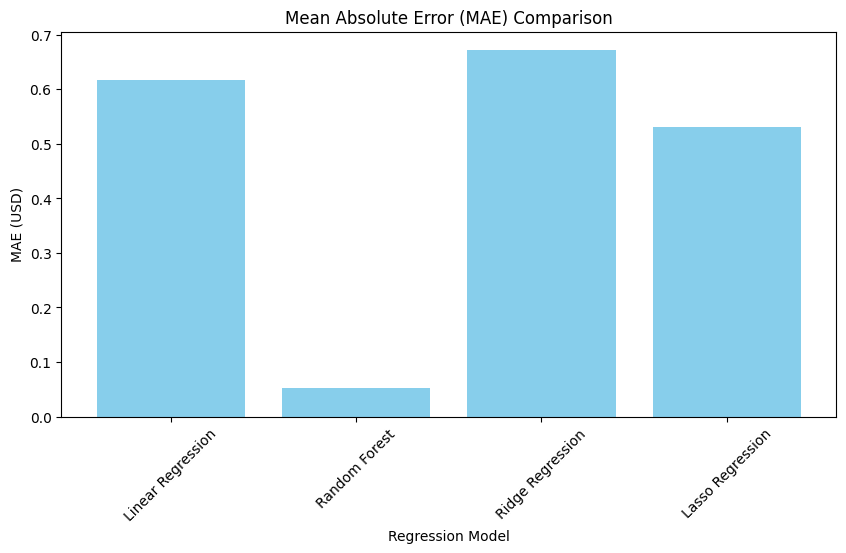

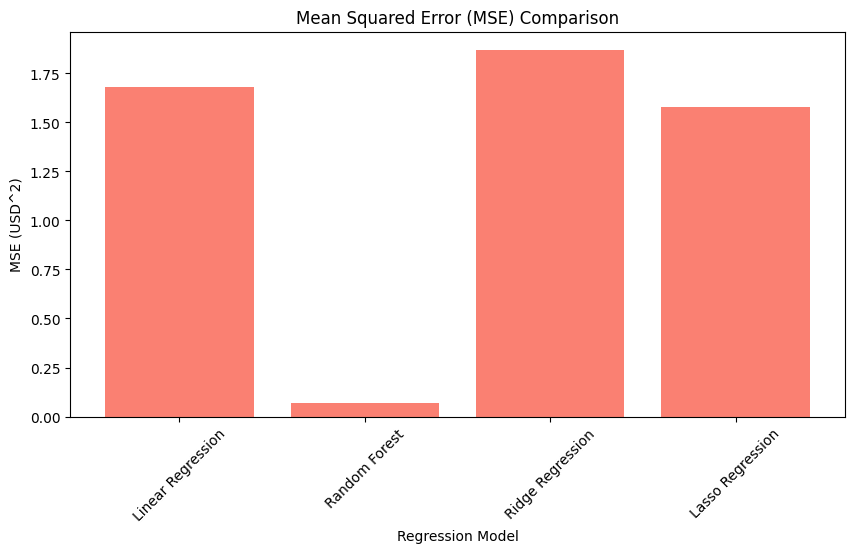

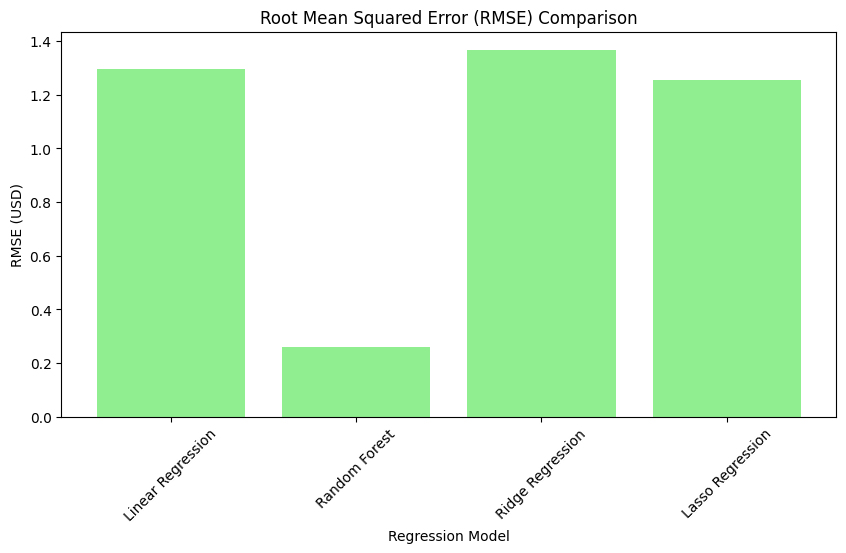

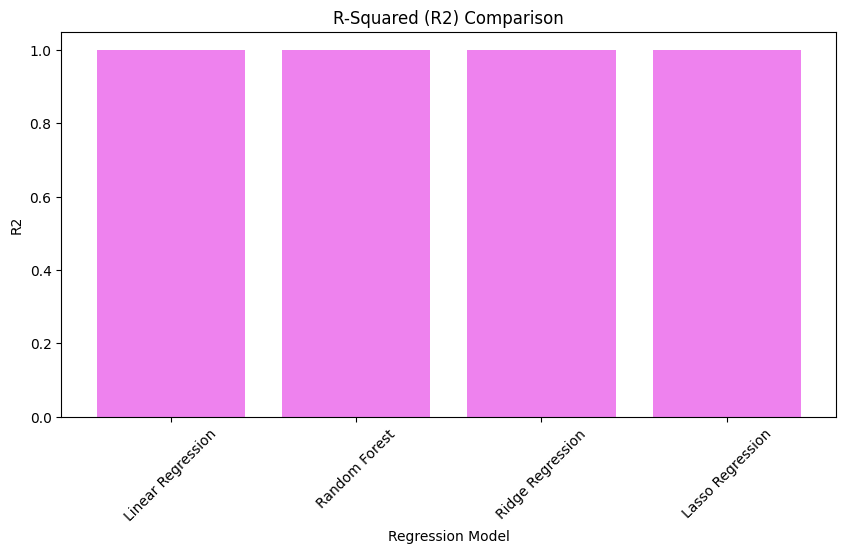

In [6]:
import matplotlib.pyplot as plt

# Define labels and data for each model
models = ['Linear Regression', 'Random Forest', 'Ridge Regression', 'Lasso Regression']
mae_scores = [linear_reg_mae, random_forest_mae, ridge_mae, lasso_mae]
mse_scores = [linear_reg_mse, random_forest_mse, ridge_mse, lasso_mse]
rmse_scores = [linear_reg_rmse, random_forest_rmse, ridge_rmse, lasso_rmse]
r2_scores = [linear_reg_r2, random_forest_r2, ridge_r2, lasso_r2]

# Plotting MAE
plt.figure(figsize=(10, 5))
plt.bar(models, mae_scores, color='skyblue')
plt.title('Mean Absolute Error (MAE) Comparison')
plt.xlabel('Regression Model')
plt.ylabel('MAE (USD)')
plt.xticks(rotation=45)
plt.show()

# Plotting MSE
plt.figure(figsize=(10, 5))
plt.bar(models, mse_scores, color='salmon')
plt.title('Mean Squared Error (MSE) Comparison')
plt.xlabel('Regression Model')
plt.ylabel('MSE (USD^2)')
plt.xticks(rotation=45)
plt.show()

# Plotting RMSE
plt.figure(figsize=(10, 5))
plt.bar(models, rmse_scores, color='lightgreen')
plt.title('Root Mean Squared Error (RMSE) Comparison')
plt.xlabel('Regression Model')
plt.ylabel('RMSE (USD)')
plt.xticks(rotation=45)
plt.show()

# Plotting R2
plt.figure(figsize=(10, 5))
plt.bar(models, r2_scores, color='violet')
plt.title('R-Squared (R2) Comparison')
plt.xlabel('Regression Model')
plt.ylabel('R2')
plt.xticks(rotation=45)
plt.show()